In [ ]:
# Import required libraries
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# Load and Preprocess the CIFAR-10 dataset
def load_and_preprocess_data():
    # Load CIFAR-10 dataset
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalize pixel values to range between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Convert class labels into one-hot encoded format
    train_labels = to_categorical(train_labels, 10)
    test_labels = to_categorical(test_labels, 10)

    return train_images, train_labels, test_images, test_labels

# Call the function to load and preprocess the data
train_images, train_labels, test_images, test_labels = load_and_preprocess_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
from tensorflow.keras import models, layers

# Design the Neural Network Architecture
def create_model():
    model = models.Sequential()

    # Input Layer: Convolution and Max Pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Hidden Layers: More Conv layers with Max Pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))

    # Output Layer: 10 classes with softmax for multi-class classification
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Create the model
model = create_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model for 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.6179 - loss: 1.0837 - val_accuracy: 0.6306 - val_loss: 1.0595
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.6594 - loss: 0.9693 - val_accuracy: 0.6529 - val_loss: 0.9949
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6916 - loss: 0.8789 - val_accuracy: 0.6846 - val_loss: 0.9050
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7154 - loss: 0.8065 - val_accuracy: 0.6751 - val_loss: 0.9401
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7307 - loss: 0.7605 - val_accuracy: 0.6970 - val_loss: 0.8733
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7488 - loss: 0.7107 - val_accuracy: 0.7007 - val_loss: 0.8832
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7652 - loss: 0.6723 - val_accuracy: 0.7091 - val_loss: 0.8651
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7813 -

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7174 - loss: 0.8680
Test Accuracy: 0.7096999883651733


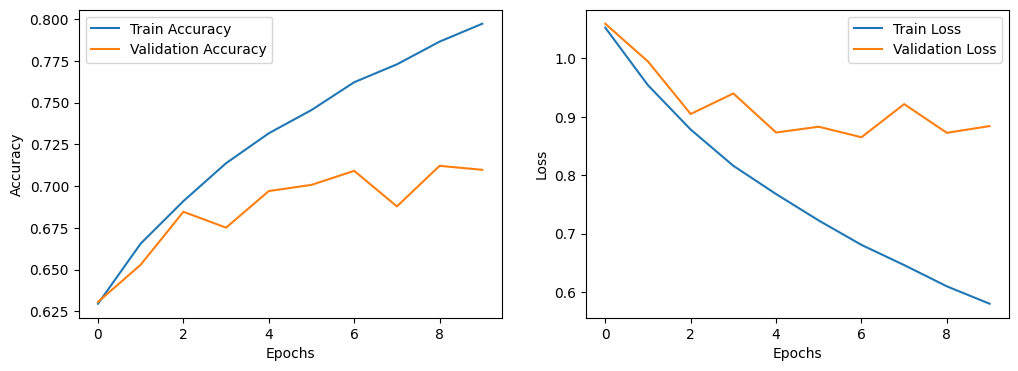

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the accuracy and loss
plot_history(history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
              precision    recall  f1-score   support

    Airplane       0.74      0.73      0.74      1000
         Car       0.78      0.87      0.82      1000
        Bird       0.57      0.63      0.60      1000
         Cat       0.58      0.44      0.50      1000
        Deer       0.66      0.66      0.66      1000
         Dog       0.64      0.58      0.61      1000
        Frog       0.77      0.79      0.78      1000
       Horse       0.73      0.72      0.73      1000
        Ship       0.78      0.81      0.80      1000
       Truck       0.77      0.82      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.71      0.70     10000



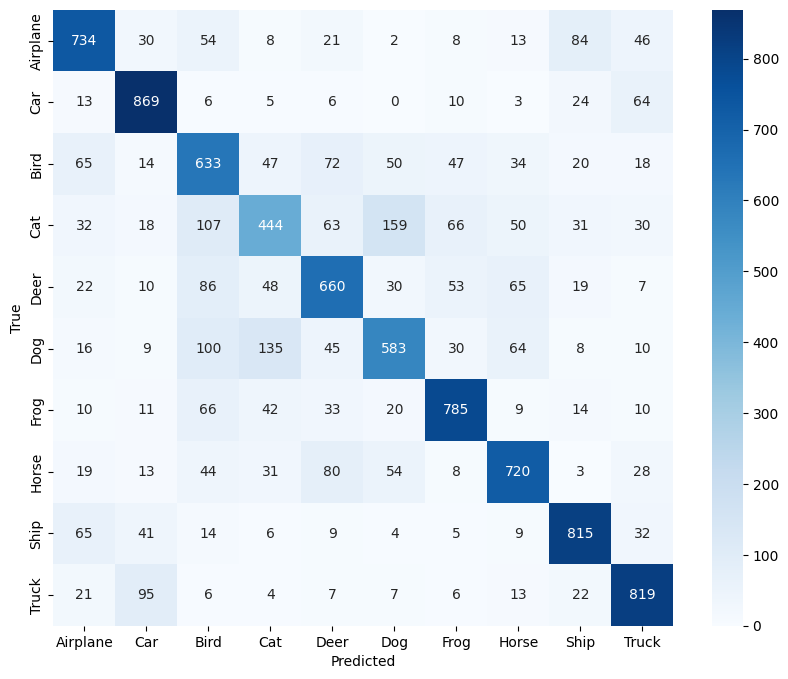

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions for test images
predictions = model.predict(test_images)
predictions = predictions.argmax(axis=1)
true_labels = test_labels.argmax(axis=1)

# Classification report
print(classification_report(true_labels, predictions, target_names=[
    'Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']))

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
    yticklabels=['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting and reduce learning rate if training plateaus
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Re-train the model with early stopping and learning rate scheduling
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate after optimization strategies
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy after optimization: {test_acc}")


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.8248 - loss: 0.5006 - val_accuracy: 0.7062 - val_loss: 0.9259 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.8370 - loss: 0.4708 - val_accuracy: 0.7142 - val_loss: 0.9375 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.8420 - loss: 0.4441 - val_accuracy: 0.7085 - val_loss: 0.9852 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.8531 - loss: 0.4196 - val_accuracy: 0.7044 - val_loss: 1.0251 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.8851 - loss: 0.3279 - val_accuracy: 0.7120 - val_loss: 1.0301 - learning_rate: 5.0000e-04
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9037 - loss: 0.2835 - val_accuracy: 0.7164 - val_loss: 1.0821 - learning_rate: 5.0000e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.